In [943]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd
import numpy as np
import json
import glob
import sys

sys.path.insert(0, "../")

root_path = '/Users/u6066091/Desktop/kaggle/input/corona_challenge/'

corona_features = {"doc_id": [None], "source": [None], "title": [None],
                  "abstract": [None], "text_body": [None]}
corona_df = pd.DataFrame.from_dict(corona_features)

json_filenames = glob.glob(f'{root_path}/**/*.json', recursive=True)

# from tqdm.notebook import tqdm

In [960]:
json_filenames[0]

'/Users/u6066091/Desktop/kaggle/input/corona_challenge/custom_license/86a998617c077f4fe2ab26214995a3548fbc0fc5.json'

In [961]:
def return_corona_df(json_filenames, df):

    for file_name in json_filenames:

        row = {"doc_id": None, "source": None, "title": None,
              "abstract": None, "text_body": None}

        with open(file_name) as json_data:
            data = json.load(json_data)

            doc_id = data['paper_id']
            row['doc_id'] = doc_id
            row['title'] = data['metadata']['title']

            # Now need all of abstract. Put it all in 
            # a list then use str.join() to split it
            # into paragraphs. 

            abstract_list = [abst['text'] for abst in data['abstract']]
            abstract = "\n ".join(abstract_list)

            row['abstract'] = abstract

            # And lastly the body of the text. 
            body_list = [bt['text'] for bt in data['body_text']]
            body = "\n ".join(body_list)
            
            row['text_body'] = body
            
            # Now just add to the dataframe. 
            
#             if source == 'b':
#                 row['source'] = "BIORXIV"
#             elif source == "c":
#                 row['source'] = "COMMON_USE_SUB"
#             elif source == "n":
#                 row['source'] = "NON_COMMON_USE"
#             elif source == "p":
#                 row['source'] = "PMC_CUSTOM_LICENSE"
            
            df = df.append(row, ignore_index=True)
    
    return df
    
corona_df = return_corona_df(json_filenames, corona_df)

In [968]:
corona_df.columns

Index(['doc_id', 'source', 'title', 'abstract', 'text_body'], dtype='object')

In [929]:
# corona_out = corona_df.to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/four_source.csv')
# metadata = pd.read_csv('/Users/u6066091/Desktop/kaggle/scimagoj_2018.csv', sep = ' ;')
metadata = pd.read_csv('/Users/u6066091/Desktop/kaggle/input/corona_challenge/metadata.csv')
# root_path = '/Users/u6066091/Desktop/kaggle/output/corona_challenge/'
# extension = 'csv'
# all_filenames = [i for i in glob.glob(f'{root_path}/**/*.csv', recursive=True)]
# all_4 = pd.concat([pd.read_csv(f) for f in all_filenames])

In [933]:
metadata.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file', 'url'],
      dtype='object')

In [934]:
# new_data = pd.merge(all_data,
#                  metadata,
#                  on='title', 
#                  how='left')
# new_data.to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/all_data_metadata.csv')
# new_data = pd.read_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/all_data_metadata.csv')

In [901]:
new_data.columns

Index(['Unnamed: 0', 'doc_id', 'source', 'title', 'abstract_x', 'text_body',
       'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract_y',
       'publish_time', 'authors', 'journal', 'Microsoft Academic Paper ID',
       'WHO #Covidence', 'has_full_text', 'full_text_file'],
      dtype='object')

In [837]:
summary = pd.read_csv('risk_covid_summary.csv')
endre = pd.merge(summary, new_data, on = 'title', how ='left')


## Risk Factors

## What do we know about COVID-19 risk factors?
The hypothesis is that if a paper's abstract has risk and Covid words together, it talks about Covid-19 risk factor. This approach, hopefully, is more targeted at high recall.

In [989]:
risk_ind = []
count_risk = []
abst_risk = []
abstract = list(corona_df['text_body'])
for i in abstract:
    if (str(i).lower().find('smok') != -1 or str(i).lower().find('pulm') != -1 and str(i).lower().find('covid') != -1):
#  risk_covi.csv    if (str(i).lower().find('risk') != -1 or str(i).lower().find('covi') != -1 ):
        abst_risk.append(i)
        count_risk.append(i.lower().count('covid')+ i.lower().count('pulm')/len(i.lower()))
corona_df_risk_covid = corona_df[corona_df['text_body'].isin(abst_risk)] 
# corona_df_risk_covid['count_risk'] = count_risk


In [990]:
corona_df_risk_covid['count_risk'] = count_risk

corona_df_risk_covid = corona_df_risk_covid.sort_values('count_risk', ascending = False).drop_duplicates('title').reset_index(drop = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [991]:
corona_df_risk_covid.head()

,doc_id,source,title,abstract,text_body,count_risk
0,320e1640a5ddfcbed21e1afff08a86dc1b0af5b2,None,"Cardiovascular Considerations for Patients, He...",,"First appearing in Wuhan, China, the coronavir...",65.000247
1,0e38333bff68345492526fd39b70d1b18969cb83,None,Deep Learning-based Detection for COVID-19 fro...,Accurate and rapid diagnosis of COVID-19 suspe...,"huge amount of efforts for radiologists, which...",62.000094
2,9e0f7bae6dd63db5ccf38bd90d3337c72eb7958a,None,Development and Evaluation of an AI System for...,Early detection of COVID-19 based on chest CT ...,"The new coronavirus disease, now known as COVI...",61.000109
3,5307fbd7cbc9b0b7e87ec4d1a8b99e544d81446f,None,The epidemiology and pathogenesis of coronavir...,,Coronavirus is one of the major pathogens that...,48.000057
4,15bad8368522a05f32dee771e5a8259f0e9cbbfd,None,Title: The SARS-CoV-2 exerts a distinctive str...,The COVID-19 disease has plagued over 110 coun...,"To gain access to host cells, coronaviruses re...",46.000069


In [912]:
list_of_journal = list(new_data['journal'].unique())
#which journals are about epidemiology
journal_of_epi = [str(i) for i in list_of_journal if 'epi' in str(i).lower() ]
corona_df_risk_covid[corona_df_risk_covid['journal'].isin(journal_of_epi)].loc[0,'text_body']

'Respiratory infections are common and one of the leading causes of morbidity and mortality, particularly in the extremes of age [1] [2] [3] . Influenza A and B, human rhinoviruses (HRV), respiratory syncytial virus (RSV), adenoviruses (ADV) and parainfluenza virus (PIV) are common respiratory viruses in adults and children [1] [2] [3] [4] [5] . Of respiratory infections, influenza is the most well studied viral infection, and is commonly reported (around 50%) as the cause of epidemics of respiratory infection, including nosocomial outbreaks [6] . Influenza virus is commonly isolated from febrile paediatric and elderly patients presenting with influenza-like illness (ILI) and acute respiratory illness (ARI) symptoms [1] . The accepted clinical case definition of ILI includes fever, which may be suitable for identifying paediatric cases, but less so for adults.\n Fever is thought of as the most common presenting symptom of influenza in hospital emergency departments; however, the presen

In [992]:
corona_df_risk_covid.loc[0,'text_body']

"First appearing in Wuhan, China, the coronavirus disease of 2019 is caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV2) (1, 2) . Given the rapid spread of this virus with consequences on an international scale, COVID-19 was declared a pandemic by the World Health\n Organization on March 11 th 2020 (2) . It is imperative that health care workers and researchers across all disciplines be aware of the potential impact that this disease can have on their respective fields and the medical community at large (3) .\n Based on currently observed disease patterns, cardiovascular (CV) specialists will be actively engaged in the care of patients with COVID-19. The infection may directly impact cardiovascular disease (CVD). Preexisting cardiovascular disease (CVD) may predispose to COVID-19 infection. Those with CVD who are infected by the virus have an elevated risk of adverse outcomes; and infection, itself, is associated with cardiovascular complications (4) (5) (6) . Moreove

In [986]:
risk_covid = corona_df_risk_covid.reset_index()

import textwrap
import random
wrapper = textwrap.TextWrapper(width = 100)
summary_examples = corona_df_risk_covid.loc[0,'abstract']

print(wrapper.fill(summary_examples))

In [915]:
corona_df_risk_covid = corona_df_risk_covid.drop_duplicates(['title'])[['doc_id', 'source', 'title', 'abstract', 'text_body',
       'index',  'sha', 'source_x', 'doi',
       'pmcid', 'pubmed_id', 'license', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file']].reset_index(drop = True)


# corona_df_risk_covid.to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/curated/risk_covi.csv')
                            

In [688]:
# corona_df_risk_smoke = pd.read_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/curated/smoke.csv')
corona_df_risk_smoke.columns

Index(['Unnamed: 0', 'doc_id', 'source', 'title', 'abstract', 'text_body',
       'index', 'count_risk', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')

## Using h_index as a factor for ranking the paper

In [761]:
# h_index = pd.read_csv('/Users/u6066091/Downloads/scimagoj_2018.csv',sep = ';')
# journal_h_index = list(corona_df_risk_covid[corona_df_risk_covid['journal'].isin(h_index['Title'])]['journal'].unique())
df_smoke = corona_df_risk_smoke.join(h_index, lsuffix='journal', rsuffix='Title')
df_smoke.columns = ['Unnamed: 0', 'doc_id', 'source', 'title', 'abstract', 'text_body',
       'index', 'count_risk', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file', 'Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR',
       'SJR Best Quartile', 'H_index', 'Total Docs. (2018)',
       'Total Docs. (3years)', 'Total Refs.', 'Total Cites (3years)',
       'Citable Docs. (3years)', 'Cites / Doc. (2years)', 'Ref. / Doc.',
       'Country', 'Publisher', 'Coverage', 'Categories']

df_smoke = df_smoke[['doc_id', 'source', 'title', 'abstract', 'text_body',
       'index', 'count_risk', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file', 'Rank', 'Sourceid','Type', 'Issn', 'SJR',
       'SJR Best Quartile', 'H_index', 'Total Docs. (2018)',
       'Total Docs. (3years)', 'Total Refs.', 'Total Cites (3years)',
       'Citable Docs. (3years)', 'Cites / Doc. (2years)', 'Ref. / Doc.',
       'Country', 'Publisher', 'Coverage', 'Categories']]

## Ranking articles

In [879]:

risk_count = [str(i).lower().count('risk')/len(str(i).lower()) for i in df_smoke_sel['text_body']]
covid_count = [str(i).lower().count('covi')*10/len(str(i).lower()) for i in df_smoke_sel['text_body']]
smok_count = [str(i).lower().count('smok')/len(str(i).lower()) for i in df_smoke_sel['text_body']]
pulm_count = [str(i).lower().count('pulm')/len(str(i).lower()) for i in df_smoke_sel['text_body']]

normalized_count = np.sum([risk_count, covid_count,smok_count, pulm_count] , axis = 0)
rank = np.array(normalized_count)*100 + np.mean(df_smoke_sel['H_index'])/1000

In [881]:
len(rank)

41

## Investigating SciSpacy for sentence similarity

In [791]:
from transformers import *
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')


In [993]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.serve(doc, style="dep")


/opt/anaconda3/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [1126]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz
!pip install en_core_sci_lg

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz (500.6 MB)
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.2.4-py3-none-any.whl size=501343161 sha256=121d30d907e6bf97109ae5d6e954082340cf664099e756503337e2b2d4ae4fa0
  Stored in directory: /Users/u6066091/Library/Caches/pip/wheels/06/a3/b5/bacce7d280488beaf177c3eadbe9f440244201544a0461f6f3
Successfully built en-core-sci-lg


In [1127]:
import scispacy
import spacy
import en_core_sci_lg   #The model we are going to use
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

In [1122]:
nlp = en_core_sci_lg.load()
# nlp = spacy.load("en_core_sci_sm") 
text = 'Myeloid derived suppressor cells (MDSC) are immature myeloid cells with immunosuppressive activity.'
#           They accumulate in tumor-bearing mice and humans 
#           with different types of cancer, including hepatocellular 
#           carcinoma (HCC).'
abbreviation_pipe = AbbreviationDetector(nlp)
nlp.add_pipe(abbreviation_pipe)
#Print the Abbreviation and it's definition
print("Abbreviation", "\t", "Definition")
for abrv in doc._.abbreviations:
      print(f"{abrv} \t ({abrv.start}, {abrv.end}) {abrv._.long_form}")


Abbreviation 	 Definition


In [1052]:
import spacy


token1 = nlp('Myeloid derived suppressor cells (MDSC) are immature myeloid cells with immunosuppressive activity.')
token2 = nlp('derived suppressor cells (MDSC) are immature myeloid cells with immunosuppressive activity.')

token2.similarity(token1)

/opt/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9909571702198852

In [1140]:
annotate = pd.read_excel('/Users/u6066091/Desktop/kaggle/annotated/smoke_risk_factor.xlsx')
annotate.columns = ['Text', 'Label']
annotate['Text'] = annotate['Text'].str.replace('\xa0',' ')
nlp = en_core_sci_lg.load()
# nlp = spacy.load("en_core_sci_lg")

article1 = pd.read_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/curated/keshav/risk_covid_summary.csv')
sim_list = []
sim_num = [] 
# jj = article1['summary'][0][1]
for jj in article1['summary']:
    for j in jj.split('.'):
        sim = [nlp(i).similarity(nlp(j)) for i in annotate['Text']]
        sim_list.append([j,sim.index(max(sim))])
        sim_num.append(max(sim))


    

In [1143]:
article1['summary'][0]

'In December 2019, an outbreak of Corona Virus Disease 2019 (COVID-19) caused by a novel coronavirus (severe acute respiratory syndrome coronavirus 2, SARS-CoV-2) began in Wuhan (Hubei, China) and spread rapidly (1) . Without efficient medicine, early detection and isolation becomes essential against novel coronavirus. Pulmonary edema caused by heart failure can be appeared as exudative disease in CT scanning, which is, sometimes, difficult to be distinguished with other exudative disease in clinical practice. Patients with negative CT findings and less than 18-years old were excluded. CC-BY-NC-ND 4.0 International license It is made available under a author/funder, who has granted medRxiv a license to display the preprint in perpetuity. is the (which was not peer-reviewed) The copyright holder for this preprint . All the COVID-19 patients were diagnosed in fever clinics and then transferred to the designated hospital in Changsha, China. Clinical records, laboratory findings, and chest

## TextRank

In [521]:
class GraphShow():
    """"Create demo page"""
    def __init__(self):
        self.base = '''
    <html>
    <head>
      <script type="text/javascript" src="VIS/dist/vis.js"></script>
      <link href="VIS/dist/vis.css" rel="stylesheet" type="text/css">
      <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    </head>
    <body>
    <div id="VIS_draw"></div>
    <script type="text/javascript">
      var nodes = data_nodes;
      var edges = data_edges;
      var container = document.getElementById("VIS_draw");
      var data = {
        nodes: nodes,
        edges: edges
      };
      var options = {
          nodes: {
              shape: 'circle',
              size: 15,
              font: {
                  size: 15
              }
          },
          edges: {
              font: {
                  size: 10,
                  align: 'center'
              },
              color: 'red',
              arrows: {
                  to: {enabled: true, scaleFactor: 1.2}
              },
              smooth: {enabled: true}
          },
          physics: {
              enabled: true
          }
      };
      var network = new vis.Network(container, data, options);
    </script>
    </body>
    </html>
    '''
    

    def create_page(self, events):
        """Read data"""
        nodes = []
        for event in events:
            nodes.append(event[0])
            nodes.append(event[1])
        node_dict = {node: index for index, node in enumerate(nodes)}

        data_nodes = []
        data_edges = []
        for node, id in node_dict.items():
            data = {}
            data["group"] = 'Event'
            data["id"] = id
            data["label"] = node
            data_nodes.append(data)

        for edge in events:
            data = {}
            data['from'] = node_dict.get(edge[0])
            data['label'] = ''
            data['to'] = node_dict.get(edge[1])
            data_edges.append(data)

        self.create_html(data_nodes, data_edges)
        return

    def create_html(self, data_nodes, data_edges):
        """Generate html file"""
        f = open('graph_show.html', 'w+')
        html = self.base.replace('data_nodes', str(data_nodes)).replace('data_edges', str(data_edges))
        f.write(html)
        f.close()


In [527]:
# !pip install spacy
# !pip install scispacy

In [533]:
import sys
from collections import defaultdict


class TextrankGraph:
    '''textrank graph'''
    def __init__(self):
        self.graph = defaultdict(list)
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 1000 # iteration steps

    def addEdge(self, start, end, weight):
        """Add edge between node"""
        self.graph[start].append((start, end, weight))
        self.graph[end].append((end, start, weight))

    def rank(self):
        """Rank all nodes"""
        weight_deafault = 1.0 / (len(self.graph) or 1.0) # initialize weight
        nodeweight_dict = defaultdict(float) # store weight of node
        outsum_node_dict = defaultdict(float) # store wegiht of out nodes
        for node, out_edge in self.graph.items(): # initilize nodes weight by edges
            # node: was
            # out_edge: [('was', 'prison', 1), ('was', 'wrong', 1), ('was', 'bad', 1)]
            nodeweight_dict[node] = weight_deafault
            outsum_node_dict[node] = sum((edge[2] for edge in out_edge), 0.0) # if no out edge, set weight 0
        
        sorted_keys = sorted(self.graph.keys()) # save node name as a list for iteration
        step_dict = [0]
        for step in range(1, self.steps):
            for node in sorted_keys:
                s = 0
                # Node's weight calculation: 
                # (edge_weight/ node's number of out link)*node_weight[edge_node]
                for e in self.graph[node]:
                    s += e[2] / outsum_node_dict[e[1]] * nodeweight_dict[e[1]]
                # Update calculation: (1-d) + d*s
                nodeweight_dict[node] = (1 - self.d) + self.d * s
            step_dict.append(sum(nodeweight_dict.values()))

            if abs(step_dict[step] - step_dict[step - 1]) <= self.min_diff:
                break

        # min-max scale to make result in range to [0 - 1]
        min_rank, max_rank = 0, 0 # initilize max and min wegiht value
        for w in nodeweight_dict.values():
            if w < min_rank:
                min_rank = w
            if w > max_rank:
                max_rank = w

        for n, w in nodeweight_dict.items():
            nodeweight_dict[n] = (w - min_rank/10.0) / (max_rank - min_rank/10.0)

        return nodeweight_dict


class TextRank:
    """Extract keywords based on textrank graph algorithm"""
    def __init__(self):
        self.candi_pos = ['NOUN', 'PROPN', 'VERB'] # 名词，专有名词，动词
        self.stop_pos = ['NUM', 'ADV'] # 数字（没有时间名词，就用数字代表了），副词
        self.span = 5

    def extract_keywords(self, word_list, num_keywords):
        g = TextrankGraph()
        cm = defaultdict(int)
        for i, word in enumerate(word_list): # word_list = [['previous', 'ADJ'], ['rumor', 'NOUN']]
            if word[1] in self.candi_pos and len(word[0]) > 1: # word = ['previous', 'ADJ']
                for j in range(i + 1, i + self.span):
                    if j >= len(word_list):
                        break
                    if word_list[j][1] not in self.candi_pos or word_list[j][1] in self.stop_pos or len(word_list[j][0]) < 2:
                        continue
                    pair = tuple((word[0], word_list[j][0]))
                    cm[(pair)] +=  1

        # cm = {('was', 'prison'): 1, ('become', 'prison'): 1}
        for terms, w in cm.items():
            g.addEdge(terms[0], terms[1], w)
        nodes_rank = g.rank()
        nodes_rank = sorted(nodes_rank.items(), key=lambda asd:asd[1], reverse=True)

        return nodes_rank[:num_keywords]

In [534]:
import re
from collections import Counter
import spacy
import scispacy
# import GraphShow
# from textrank import TextRank


nlp = spacy.load('en_core_web_sm')

class NewsMining():
    """News Mining"""
    def __init__(self):
        self.textranker = TextRank()
        self.ners = ['PERSON', 'ORG', 'GPE']
        self.ner_dict = {
            'PERSON': 'Person',  # People, including fictional
            'ORG': 'Organization',  # Companies, agencies, institutions, etc.
            'GPE': 'Location',  # Countries, cities, states.
        }
        # dependency markers for subjects
        self.SUBJECTS = {"nsubj", "nsubjpass",
                         "csubj", "csubjpass", "agent", "expl"}
        # dependency markers for objects
        self.OBJECTS = {"dobj", "dative", "attr", "oprd"}

        self.graph_shower = GraphShow()

    def clean_spaces(self, s):
        s = s.replace('\r', '')
        s = s.replace('\t', ' ')
        s = s.replace('\n', ' ')
        return s

    def remove_noisy(self, content):
        """Remove brackets"""
        p1 = re.compile(r'（[^）]*）')
        p2 = re.compile(r'\([^\)]*\)')
        return p2.sub('', p1.sub('', content))

    def collect_ners(self, ents):
        """Collect token only with PERSON, ORG, GPE"""
        collected_ners = []
        for token in ents:
            if token.label_ in self.ners:
                collected_ners.append(token.text + '/' + token.label_)
        return collected_ners

    def conll_syntax(self, sent):
        """Convert one sentence to conll format."""

        tuples = list()
        for word in sent:
            if word.head is word:
                head_idx = 0
            else:
                head_idx = word.head.i + 1
            tuples.append([word.i + 1,  # Current word index, begin with 1
                           word.text,  # Word
                           word.lemma_,  # Lemma
                           word.pos_,  # Coarse-grained tag
                           word.tag_,  # Fine-grained tag
                           '_',
                           head_idx,  # Head of current  Index
                           word.dep_,  # Relation
                           '_', '_'])
        return tuples

    def syntax_parse(self, sent):
        """Convert one sentence to conll format."""
        tuples = list()
        for word in sent:
            if word.head is word:
                head_idx = 0
            else:
                head_idx = word.head.i + 1
            tuples.append([word.i + 1,  # Current word index, begin with 1
                           word.text,  # Word
                           word.pos_,  # Coarse-grained tag
                           word.head,
                           head_idx,  # Head of current  Index
                           word.dep_,  # Relation
                           ])
        return tuples

    def build_parse_chile_dict(self, sent, tuples):
        child_dict_list = list()
        for word in sent:
            child_dict = dict()
            for arc in tuples:
                if arc[3] == word:
                    if arc[-1] in child_dict:
                        child_dict[arc[-1]].append(arc)
                    else:
                        child_dict[arc[-1]] = []
                        child_dict[arc[-1]].append(arc)
            child_dict_list.append([word, word.pos_, word.i, child_dict])
        return child_dict_list

    def complete_VOB(self, verb, child_dict_list):
        '''Find VOB by SBV'''
        for child in child_dict_list:
            word = child[0]
            # child_dict: {'dobj': [[7, 'startup', 'NOUN', buying, 5, 'dobj']], 'prep': [[8, 'for', 'ADP', buying, 5, 'prep']]}
            child_dict = child[3]
            if word == verb:
                for object_type in self.OBJECTS:  # object_type: 'dobj'
                    if object_type not in child_dict:
                        continue
                    # [7, 'startup', 'NOUN', buying, 5, 'dobj']
                    vob = child_dict[object_type][0]
                    obj = vob[1]  # 'startup'
                    return obj
        return ''

    def extract_triples(self, sent):
        svo = []
        tuples = self.syntax_parse(sent)
        child_dict_list = self.build_parse_chile_dict(sent, tuples)
        for tuple in tuples:
            rel = tuple[-1]
            if rel in self.SUBJECTS:
                sub_wd = tuple[1]
                verb_wd = tuple[3]
                obj = self.complete_VOB(verb_wd, child_dict_list)
                subj = sub_wd
                verb = verb_wd.text
                if not obj:
                    svo.append([subj, verb])
                else:
                    svo.append([subj, verb+' '+obj])
        return svo

    def extract_keywords(self, words_postags):
        return self.textranker.extract_keywords(words_postags, 10)

    def collect_coexist(self, ner_sents, ners):
        """Construct NER co-occurrence matrices"""
        co_list = []
        for words in ner_sents:
            co_ners = set(ners).intersection(set(words))
            co_info = self.combination(list(co_ners))
            co_list += co_info
        if not co_list:
            return []
        return {i[0]: i[1] for i in Counter(co_list).most_common()}

    def combination(self, a):
        '''list all combination'''
        combines = []
        if len(a) == 0:
            return []
        for i in a:
            for j in a:
                if i == j:
                    continue
                combines.append('@'.join([i, j]))
        return combines

    def main(self, content):
        '''Main function'''
        if not content:
            return []

        words_postags = []  # token and its POS tag
        ner_sents = []      # store sentences which contain NER entity
        ners = []           # store all NER entity from whole article
        triples = []        # store subject verb object
        events = []         # store events

        # 01 remove linebreaks and brackets
        content = self.remove_noisy(content)
        content = self.clean_spaces(content)

        # 02 split to sentences
        doc = nlp(content)

        for i, sent in enumerate(doc.sents):
            words_postags = [[token.text, token.pos_] for token in sent]
            words = [token.text for token in sent]
            postags = [token.pos_ for token in sent]
            ents = nlp(sent.text).ents  # NER detection
            collected_ners = self.collect_ners(ents)

            if collected_ners:  # only extract triples when the sentence contains 'PERSON', 'ORG', 'GPE'
                triple = self.extract_triples(sent)
                if not triple:
                    continue
                triples += triple
                ners += collected_ners
                ner_sents.append(
                    [token.text + '/' + token.label_ for token in sent.ents])

        # 03 get keywords
        keywords = [i[0] for i in self.extract_keywords(words_postags)]
        for keyword in keywords:
            name = keyword
            cate = 'keyword'
            events.append([name, cate])

        # 04 add triples to event only the word in keyword
        for t in triples:
            if (t[0] in keywords or t[1] in keywords) and len(t[0]) > 1 and len(t[1]) > 1:
                events.append([t[0], t[1]])

        # 05 get word frequency and add to events
        word_dict = [i for i in Counter([i[0] for i in words_postags if i[1] in [
                                        'NOUN', 'PROPN', 'VERB'] and len(i[0]) > 1]).most_common()][:10]
        for wd in word_dict:
            name = wd[0]
            cate = 'frequency'
            events.append([name, cate])

        # 06 get NER from whole article
        ner_dict = {i[0]: i[1] for i in Counter(ners).most_common(20)}
        for ner in ner_dict:
            name = ner.split('/')[0]  # Jessica Miller
            cate = self.ner_dict[ner.split('/')[1]]  # PERSON
            events.append([name, cate])

        # 07 get all NER entity co-occurrence information
        # here ner_dict is from above 06
        co_dict = self.collect_coexist(ner_sents, list(ner_dict.keys()))
        co_events = [[i.split('@')[0].split(
            '/')[0], i.split('@')[1].split('/')[0]] for i in co_dict]
        events += co_events

        # 08 show event graph
        self.graph_shower.create_page(events)
        

In [535]:
import re
from collections import Counter
import spacy
# from graph_show import GraphShow
# from textrank import TextRank


nlp = spacy.load('en_core_web_sm')

class NewsMining():
    """News Mining"""
    def __init__(self):
        self.textranker = TextRank()
        self.ners = ['PERSON', 'ORG', 'GPE']
        self.ner_dict = {
            'PERSON': 'Person',  # People, including fictional
            'ORG': 'Organization',  # Companies, agencies, institutions, etc.
            'GPE': 'Location',  # Countries, cities, states.
        }
        # dependency markers for subjects
        self.SUBJECTS = {"nsubj", "nsubjpass",
                         "csubj", "csubjpass", "agent", "expl"}
        # dependency markers for objects
        self.OBJECTS = {"dobj", "dative", "attr", "oprd"}

        self.graph_shower = GraphShow()

    def clean_spaces(self, s):
        s = s.replace('\r', '')
        s = s.replace('\t', ' ')
        s = s.replace('\n', ' ')
        return s

    def remove_noisy(self, content):
        """Remove brackets"""
        p1 = re.compile(r'（[^）]*）')
        p2 = re.compile(r'\([^\)]*\)')
        return p2.sub('', p1.sub('', content))

    def collect_ners(self, ents):
        """Collect token only with PERSON, ORG, GPE"""
        collected_ners = []
        for token in ents:
            if token.label_ in self.ners:
                collected_ners.append(token.text + '/' + token.label_)
        return collected_ners

    def conll_syntax(self, sent):
        """Convert one sentence to conll format."""

        tuples = list()
        for word in sent:
            if word.head is word:
                head_idx = 0
            else:
                head_idx = word.head.i + 1
            tuples.append([word.i + 1,  # Current word index, begin with 1
                           word.text,  # Word
                           word.lemma_,  # Lemma
                           word.pos_,  # Coarse-grained tag
                           word.tag_,  # Fine-grained tag
                           '_',
                           head_idx,  # Head of current  Index
                           word.dep_,  # Relation
                           '_', '_'])
        return tuples

    def syntax_parse(self, sent):
        """Convert one sentence to conll format."""
        tuples = list()
        for word in sent:
            if word.head is word:
                head_idx = 0
            else:
                head_idx = word.head.i + 1
            tuples.append([word.i + 1,  # Current word index, begin with 1
                           word.text,  # Word
                           word.pos_,  # Coarse-grained tag
                           word.head,
                           head_idx,  # Head of current  Index
                           word.dep_,  # Relation
                           ])
        return tuples

    def build_parse_chile_dict(self, sent, tuples):
        child_dict_list = list()
        for word in sent:
            child_dict = dict()
            for arc in tuples:
                if arc[3] == word:
                    if arc[-1] in child_dict:
                        child_dict[arc[-1]].append(arc)
                    else:
                        child_dict[arc[-1]] = []
                        child_dict[arc[-1]].append(arc)
            child_dict_list.append([word, word.pos_, word.i, child_dict])
        return child_dict_list

    def complete_VOB(self, verb, child_dict_list):
        '''Find VOB by SBV'''
        for child in child_dict_list:
            word = child[0]
            # child_dict: {'dobj': [[7, 'startup', 'NOUN', buying, 5, 'dobj']], 'prep': [[8, 'for', 'ADP', buying, 5, 'prep']]}
            child_dict = child[3]
            if word == verb:
                for object_type in self.OBJECTS:  # object_type: 'dobj'
                    if object_type not in child_dict:
                        continue
                    # [7, 'startup', 'NOUN', buying, 5, 'dobj']
                    vob = child_dict[object_type][0]
                    obj = vob[1]  # 'startup'
                    return obj
        return ''

    def extract_triples(self, sent):
        svo = []
        tuples = self.syntax_parse(sent)
        child_dict_list = self.build_parse_chile_dict(sent, tuples)
        for tuple in tuples:
            rel = tuple[-1]
            if rel in self.SUBJECTS:
                sub_wd = tuple[1]
                verb_wd = tuple[3]
                obj = self.complete_VOB(verb_wd, child_dict_list)
                subj = sub_wd
                verb = verb_wd.text
                if not obj:
                    svo.append([subj, verb])
                else:
                    svo.append([subj, verb+' '+obj])
        return svo

    def extract_keywords(self, words_postags):
        return self.textranker.extract_keywords(words_postags, 10)

    def collect_coexist(self, ner_sents, ners):
        """Construct NER co-occurrence matrices"""
        co_list = []
        for words in ner_sents:
            co_ners = set(ners).intersection(set(words))
            co_info = self.combination(list(co_ners))
            co_list += co_info
        if not co_list:
            return []
        return {i[0]: i[1] for i in Counter(co_list).most_common()}

    def combination(self, a):
        '''list all combination'''
        combines = []
        if len(a) == 0:
            return []
        for i in a:
            for j in a:
                if i == j:
                    continue
                combines.append('@'.join([i, j]))
        return combines

    def main(self, content):
        '''Main function'''
        if not content:
            return []

        words_postags = []  # token and its POS tag
        ner_sents = []      # store sentences which contain NER entity
        ners = []           # store all NER entity from whole article
        triples = []        # store subject verb object
        events = []         # store events

        # 01 remove linebreaks and brackets
        content = self.remove_noisy(content)
        content = self.clean_spaces(content)

        # 02 split to sentences
        doc = nlp(content)

        for i, sent in enumerate(doc.sents):
            words_postags = [[token.text, token.pos_] for token in sent]
            words = [token.text for token in sent]
            postags = [token.pos_ for token in sent]
            ents = nlp(sent.text).ents  # NER detection
            collected_ners = self.collect_ners(ents)

            if collected_ners:  # only extract triples when the sentence contains 'PERSON', 'ORG', 'GPE'
                triple = self.extract_triples(sent)
                if not triple:
                    continue
                triples += triple
                ners += collected_ners
                ner_sents.append(
                    [token.text + '/' + token.label_ for token in sent.ents])

        # 03 get keywords
        keywords = [i[0] for i in self.extract_keywords(words_postags)]
        for keyword in keywords:
            name = keyword
            cate = 'keyword'
            events.append([name, cate])

        # 04 add triples to event only the word in keyword
        for t in triples:
            if (t[0] in keywords or t[1] in keywords) and len(t[0]) > 1 and len(t[1]) > 1:
                events.append([t[0], t[1]])

        # 05 get word frequency and add to events
        word_dict = [i for i in Counter([i[0] for i in words_postags if i[1] in [
                                        'NOUN', 'PROPN', 'VERB'] and len(i[0]) > 1]).most_common()][:10]
        for wd in word_dict:
            name = wd[0]
            cate = 'frequency'
            events.append([name, cate])

        # 06 get NER from whole article
        ner_dict = {i[0]: i[1] for i in Counter(ners).most_common(20)}
        for ner in ner_dict:
            name = ner.split('/')[0]  # Jessica Miller
            cate = self.ner_dict[ner.split('/')[1]]  # PERSON
            events.append([name, cate])

        # 07 get all NER entity co-occurrence information
        # here ner_dict is from above 06
        co_dict = self.collect_coexist(ner_sents, list(ner_dict.keys()))
        co_events = [[i.split('@')[0].split(
            '/')[0], i.split('@')[1].split('/')[0]] for i in co_dict]
        events += co_events

        # 08 show event graph
        self.graph_shower.create_page(events)

In [545]:
class GraphShow():
    """"Create demo page"""
    def __init__(self):
        self.base = '''
    <html>
    <head>
      <script type="text/javascript" src="VIS/dist/vis.js"></script>
      <link href="VIS/dist/vis.css" rel="stylesheet" type="text/css">
      <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    </head>
    <body>
    <div id="VIS_draw"></div>
    <script type="text/javascript">
      var nodes = data_nodes;
      var edges = data_edges;
      var container = document.getElementById("VIS_draw");
      var data = {
        nodes: nodes,
        edges: edges
      };
      var options = {
          nodes: {
              shape: 'circle',
              size: 15,
              font: {
                  size: 15
              }
          },
          edges: {
              font: {
                  size: 10,
                  align: 'center'
              },
              color: 'red',
              arrows: {
                  to: {enabled: true, scaleFactor: 1.2}
              },
              smooth: {enabled: true}
          },
          physics: {
              enabled: true
          }
      };
      var network = new vis.Network(container, data, options);
    </script>
    </body>
    </html>
    '''
    

    def create_page(self, events):
        """Read data"""
        nodes = []
        for event in events:
            nodes.append(event[0])
            nodes.append(event[1])
        node_dict = {node: index for index, node in enumerate(nodes)}

        data_nodes = []
        data_edges = []
        for node, id in node_dict.items():
            data = {}
            data["group"] = 'Event'
            data["id"] = id
            data["label"] = node
            data_nodes.append(data)

        for edge in events:
            data = {}
            data['from'] = node_dict.get(edge[0])
            data['label'] = ''
            data['to'] = node_dict.get(edge[1])
            data_edges.append(data)

        self.create_html(data_nodes, data_edges)
        return

    def create_html(self, data_nodes, data_edges):
        """Generate html file"""
        f = open('graph_show.html', 'w+')
        html = self.base.replace('data_nodes', str(data_nodes)).replace('data_edges', str(data_edges))
        f.write(html)
        f.close()

In [546]:
content = corona_df_risk_covid.at[11821,'text_body' ]
Miner = NewsMining()
Miner.main(content)

## Using h_index as a factor for ranking the paper

In [709]:
# h_index = pd.read_csv('/Users/u6066091/Downloads/scimagoj_2018.csv',sep = ';')
# journal_h_index = list(corona_df_risk_covid[corona_df_risk_covid['journal'].isin(h_index['Title'])]['journal'].unique())
corona_df_risk_smoke.join(h_index, lsuffix='journal', rsuffix='Title').columns

Index(['Unnamed: 0', 'doc_id', 'source', 'title', 'abstract', 'text_body',
       'index', 'count_risk', 'sha', 'source_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file', 'Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR',
       'SJR Best Quartile', 'H index', 'Total Docs. (2018)',
       'Total Docs. (3years)', 'Total Refs.', 'Total Cites (3years)',
       'Citable Docs. (3years)', 'Cites / Doc. (2years)', 'Ref. / Doc.',
       'Country', 'Publisher', 'Coverage', 'Categories'],
      dtype='object')

In [707]:
len(h_index[h_index['Title'].isin(journal_h_index)]['Title'])

123

In [673]:
h_index.columns

Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2018)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Publisher',
       'Coverage', 'Categories'],
      dtype='object')

In [398]:
corona_df_risk_covid.sort_values('count_risk', ascending = False).to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/curated/risk_covid.csv')


In [422]:
# !pip install pytorch_pretrained_bert 
# !pip install pytorch_transformers
# !pip install scispacy
# !pip install bert_tokenizer
# !pip install -q keras
# !pip install -U sentence-transformers


In [420]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [02:01<00:00, 3.32MB/s] 


In [428]:
#Encoding sentences using BERT
embed = []
for i in corona_df_risk_covid['abstract']:
    sentence_embeddings = model.encode(i)
    embed.append(sentence_embeddings)
# it took 20 min for 72 records    

In [489]:
data = [embed[ii][0:60] for ii in range(len(embed))]


In [492]:
# import KMeans
from sklearn.cluster import KMeans
import numpy as np
# create kmeans object
kmeans = KMeans(n_clusters=5)
# fit kmeans object to data
embed_np = np.array(data)
embed_resh = embed_np.reshape(72,60*768 )
kmeans.fit(embed_res)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# # save new clusters for chart
y_km = kmeans.predict(embed_resh)
plt.scatter(embed_resh[y_km ==0,0], embed_resh[y_km == 0,1], s=100, c='red')
plt.scatter(embed_resh[y_km ==1,0], embed_resh[y_km == 1,1], s=100, c='cyan')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

ValueError: cannot reshape array of size 4423680 into shape (72,46080)

In [433]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [436]:
embed.type

AttributeError: 'list' object has no attribute 'type'

In [425]:

sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

In [413]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM, BertForSequenceClassification
from pytorch_transformers import BertTokenizer, BertModel, BertForMaskedLM



In [416]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:16<00:00, 13948.12B/s]


In [ ]:
def _get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def _get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = True
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            if first_sep:
                first_sep = False 
            else:
                current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

def _get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def _trim_input(title, question, answer, max_sequence_length, 
                t_max_len=30, q_max_len=239, a_max_len=239):
#     import BertTokenizer
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    
    t = tokenizer.tokenize(title)
    q = tokenizer.tokenize(question)
    a = tokenizer.tokenize(answer)
    
    t_len = len(t)
    q_len = len(q)
    a_len = len(a)

    if (t_len+q_len+a_len+4) > max_sequence_length:
        
        if t_max_len > t_len:
            t_new_len = t_len
            a_max_len = a_max_len + floor((t_max_len - t_len)/2)
            q_max_len = q_max_len + ceil((t_max_len - t_len)/2)
        else:
            t_new_len = t_max_len
      
        if a_max_len > a_len:
            a_new_len = a_len 
            q_new_len = q_max_len + (a_max_len - a_len)
        elif q_max_len > q_len:
            a_new_len = a_max_len + (q_max_len - q_len)
            q_new_len = q_len
        else:
            a_new_len = a_max_len
            q_new_len = q_max_len
            
            
        if t_new_len+a_new_len+q_new_len+4 != max_sequence_length:
            raise ValueError("New sequence length should be %d, but is %d" 
                             % (max_sequence_length, (t_new_len+a_new_len+q_new_len+4)))
        
        t = t[:t_new_len]
        q = q[:q_new_len]
        a = a[:a_new_len]
    
    return t, q, a

def _convert_to_bert_inputs(title, question, answer, tokenizer, max_sequence_length):
    """Converts tokenized input to ids, masks and segments for BERT"""
    
    stoken = ["[CLS]"] + title + ["[SEP]"] + question + ["[SEP]"] + answer + ["[SEP]"]

    input_ids = _get_ids(stoken, tokenizer, max_sequence_length)
    input_masks = _get_masks(stoken, max_sequence_length)
    input_segments = _get_segments(stoken, max_sequence_length)

    return [input_ids, input_masks, input_segments]

def compute_input_arays(df, columns, tokenizer, max_sequence_length):
    input_ids, input_masks, input_segments = [], [], []
    for _, instance in (df[columns].iterrows()):
        t, q, a = instance.question_title, instance.question_body, instance.answer

        t, q, a = _trim_input(t, q, a, max_sequence_length)

        ids, masks, segments = _convert_to_bert_inputs(t, q, a, tokenizer, max_sequence_length)
        input_ids.append(ids)
        input_masks.append(masks)
        input_segments.append(segments)
        
    return [np.asarray(input_ids, dtype=np.int32), 
            np.asarray(input_masks, dtype=np.int32), 
            np.asarray(input_segments, dtype=np.int32)]


def compute_output_arrays(df, columns):
    return np.asarray(df[columns])
# 3. Create model
# compute_spearmanr() is used to compute the competition metric for the validation set

# CustomCallback() is a class which inherits from tf.keras.callbacks.Callback and will compute and append validation score and validation/test predictions respectively, after each epoch.

# bert_model() contains the actual architecture that will be used to finetune BERT to our dataset. It's simple, just taking the sequence_output of the bert_layer and pass it to an AveragePooling layer and finally to an output layer of 30 units (30 classes that we have to predict)

# train_and_predict() this function will be run to train and obtain predictions

def compute_spearmanr(trues, preds):
    rhos = []
    for col_trues, col_pred in zip(trues.T, preds.T):
        rhos.append(
            spearmanr(col_trues, col_pred + np.random.normal(0, 1e-7, col_pred.shape[0])).correlation)
    return np.mean(rhos)


class CustomCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_data, test_data, batch_size=16, fold=None):

        self.valid_inputs = valid_data[0]
        self.valid_outputs = valid_data[1]
        self.test_inputs = test_data
        
        self.batch_size = batch_size
        self.fold = fold
        
    def on_train_begin(self, logs={}):
        self.valid_predictions = []
        self.test_predictions = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.valid_predictions.append(
            self.model.predict(self.valid_inputs, batch_size=self.batch_size))
        
        rho_val = compute_spearmanr(
            self.valid_outputs, np.average(self.valid_predictions, axis=0))
        
        print("\nvalidation rho: %.4f" % rho_val)
        
        if self.fold is not None:
            self.model.save_weights(f'bert-base-{fold}-{epoch}.h5py')
        
        self.test_predictions.append(
            self.model.predict(self.test_inputs, batch_size=self.batch_size)
        )

def bert_model():
    
    input_word_ids = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_word_ids')
    input_masks = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_masks')
    input_segments = tf.keras.layers.Input(
        (MAX_SEQUENCE_LENGTH,), dtype=tf.int32, name='input_segments')
    
    bert_layer = hub.KerasLayer(BERT_PATH, trainable=True)
    
    _, sequence_output = bert_layer([input_word_ids, input_masks, input_segments])
    
    x = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)
    x = tf.keras.layers.Dropout(0.2)(x)
    out = tf.keras.layers.Dense(30, activation="sigmoid", name="dense_output")(x)

    model = tf.keras.models.Model(
        inputs=[input_word_ids, input_masks, input_segments], outputs=out)
    
    return model    
        
def train_and_predict(model, train_data, valid_data, test_data, 
                      learning_rate, epochs, batch_size, loss_function, fold):
        
    custom_callback = CustomCallback(
        valid_data=(valid_data[0], valid_data[1]), 
        test_data=test_data,
        batch_size=batch_size,
        fold=None)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss=loss_function, optimizer=optimizer)
    model.fit(train_data[0], train_data[1], epochs=epochs, 
              batch_size=batch_size, callbacks=[custom_callback])
    
    return custom_callback

In [399]:
# Screening for smoke related risk factor
smoke_ind = []

for i in corona_df['abstract']:
    if ((str(i).lower().find('smok') != -1) or (str(i).lower().find('pulmo') != -1)):
    
        smoke_ind.append(i)

corona_df_smoke = corona_df[corona_df['abstract'].isin(smoke_ind)]       
    
        

In [400]:
corona_df_risk[~corona_df_risk.isin(corona_df_smoke)].dropna()
# len(smoke_ind)

,doc_id,source,title,abstract,text_body,count_risk
0,6599ebbef3d868afac9daa4f80fa075675cf03bc,BIORXIV,International aviation emissions to 2025: Can ...,"International aviation is growing rapidly, res...","Sixty years ago, civil aviation was an infant ...",1
3,45e7c863c8a0bf2f373a64c3d7ba1546ca26d672,BIORXIV,Airborne bioaerosols and their impact on human...,Bioaerosols consist of aerosols originated bio...,Bioaerosols are very small airborne particles ...,1
5,62bf1af0ca05d3fdd4eea15b337d389713a387bc,BIORXIV,AN EMERGENCY MEDICAL SERVICES TRANSFER AUTHORI...,Objective. To describe the rapid development a...,Conclusions. Rapid establishment of an EMS-bas...,2
25,1af946e7a63239d9b462e126f98d0cd6d24df4bd,BIORXIV,Respiratory viral coinfection and disease seve...,Background: With advent of molecular diagnosti...,"etiological agents involved in such cases [1, ...",2
31,6c806034d4e17f1e43b7415c9c906c8160622694,BIORXIV,Spatial-temporal transmission of influenza and...,Cities and urban areas play an important role ...,"Every year in the United States, influenza (co...",5
...,...,...,...,...,...,...
19979,8780e9524d9271a7b8e789f0f8c4eb6860ca8c50,BIORXIV,"Avian viral surveillance in Victoria, Australi...",Viruses in avian hosts can pose threats to avi...,Introduction Avian species serve as hosts for ...,1
19980,05f2d4c337413ae496e31e2259020f3e328dcfa1,BIORXIV,Recombinase Polymerase Amplification Assay for...,Over 2.5 billion people are exposed to the ris...,Dengue virus (DENV) is a mosquito-transmitted ...,1
19989,b38f3c83aaa3fa7c8f5c87af266793afcbd11c86,COMMON_USE_SUB,Prediction of criticality in patients with sev...,"We screened the electronic records of 2,799 pa...",The outbreaks of COVID-19 epidemic has caused ...,2
19990,6efe01046ce81279412ea440a4b246f942f29124,COMMON_USE_SUB,Systematic Review of the Registered Clinical T...,Background: Since the outbreak of coronavirus ...,This review presented a narrative synthesis. T...,1


In [280]:
corona_df_smoke = corona_df_smoke.dropna()
corona_df_smoke.to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/smoke_pulmo_full_text.csv')

In [301]:
# Screening for pregnancy/baby
baby_ind = []

for i in corona_df['text_body']:
    if ((str(i).lower().find('pregn') != -1) or (str(i).lower().find('baby') != -1) or str(i).lower().find('infant') != -1
         or (str(i).lower().find('new born') != -1)):
    
        baby_ind.append(i)

corona_df_baby = corona_df[corona_df['text_body'].isin(baby_ind)]       

In [303]:
corona_df_baby = corona_df_baby.drop_duplicates(['abstract'])

In [305]:
corona_df_baby.to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/baby_pregnant.csv')

In [306]:
corona_df_baby.sample(10).to_csv('/Users/u6066091/Desktop/kaggle/output/corona_challenge/baby_morvarid.csv')

In [183]:
corona_df_nosomek.sample(10,random_state=40)
corona_df_nosomek.source.unique()

array(['COMMON_USE_SUB'], dtype=object)

In [177]:
i = corona_df.loc[1,'title']
res = i.find('seq')
res


-1

In [178]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

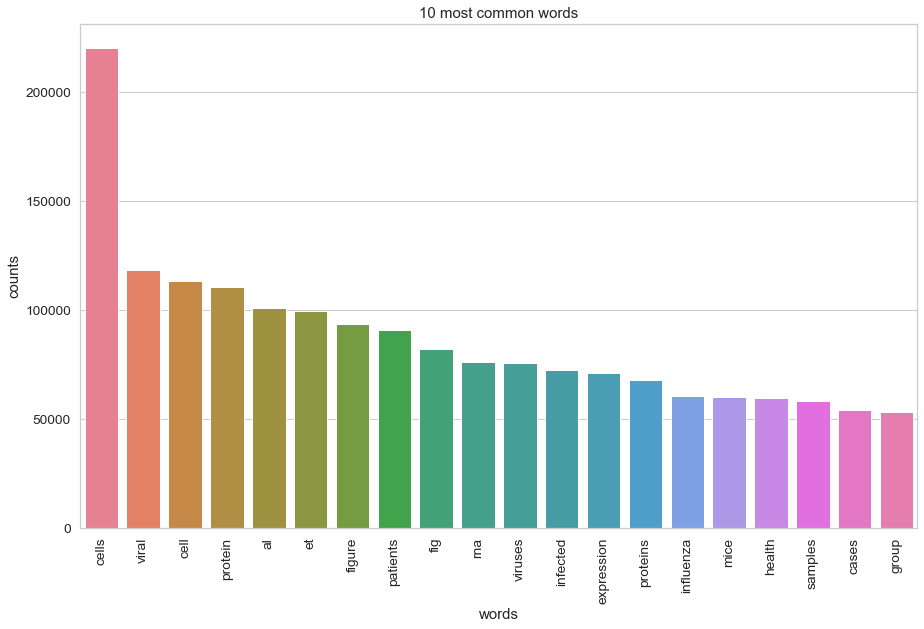

In [22]:
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(ngram_range=(1, 1), max_df =0.7)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(corona_df['text_body'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [25]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 20
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
sequences sequence viruses model species figure genome samples rna viral pcr transmission preprint host strains gene fig cases new doi

Topic #1:
et al genes dogs gene expression protein cell cats 2013 2012 figure 2014 cells 2011 significant 2015 proteins identified levels

Topic #2:
cells protein cell viral proteins fig rna figure binding activity expression replication ml infected anti membrane mm viruses cov assay

Topic #3:
cells mice cell il immune infected expression response ifn viral vaccine responses group levels fig antibody against anti figure animals

Topic #4:
patients health influenza respiratory cases clinical who risk age children patient infections years public days group will treatment hospital among


In [28]:
!pip install pyLDAvis

Processing /Users/u6066091/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414/pyLDAvis-2.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 548 kB 182 kB/s eta 0:00:01
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=f0524d107ac9f87f88b1696d6b453d84f0e3915844c7778b98fe1098a9d311ea
  Stored in directory: /Users/u6066091/Library/Caches/pip/wheels/3c/33/97/805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built funcy


In [35]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
# if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#     with open(LDAvis_data_filepath, 'w') as f:
#         pickle.dump(LDAvis_prepared, f)
        
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath) as f:
#     LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')
LDAvis_prepared

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 3min 15s, sys: 3.25 s, total: 3min 18s
Wall time: 3min 48s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.136838  0.034965       1        1  28.561993
4     -0.175472 -0.083036       2        1  25.407176
0     -0.111001  0.088936       3        1  21.305861
3      0.105380 -0.125554       4        1  15.956257
1      0.044255  0.084689       5        1   8.768714, topic_info=             Term           Freq          Total Category  logprob  loglift
135574         et   97782.000000   97782.000000  Default  30.0000  30.0000
47446          al   99143.000000   99143.000000  Default  29.0000  29.0000
87721       cells  218352.000000  218352.000000  Default  28.0000  28.0000
229297       mice   60079.000000   60079.000000  Default  27.0000  27.0000
266585   patients   90558.000000   90558.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
163066      group    4711.576249   52741.665094   Topi

In [35]:
biorxiv_dir = '/Users/u6066091/Desktop/kaggle/input/corona_challenge/biorxiv_medrxiv/'
filenames = os.listdir(biorxiv_dir)
print("Number of articles retrieved from biorxiv:", len(filenames))

Number of articles retrieved from biorxiv: 803


In [60]:
pmc_custom_license = '/Users/u6066091/Desktop/kaggle/input/corona_challenge/pmc_custom_license/'
filenames = os.listdir(pmc_custom_license)
print("Number of articles retrieved from pmc_custom_license:", len(filenames))

Number of articles retrieved from pmc_custom_license: 787


In [62]:
all_files = []

for filename in filenames:
    filename = pmc_custom_license + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [46]:
all_files[0]['metadata']['title']

'Multimerization of HIV-1 integrase hinges on conserved SH3-docking platforms'

In [39]:
file = all_files[0]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [53]:
# helper function

def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [63]:
cleaned_files = []
for file in all_files:
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    cleaned_files.append(features)

In [64]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.loc[0,'text']


"\n\n20-kb insert library preparation protocol (https://www.pacb.com/wp-content/uploads/ Procedure-Checklist-20-kb-Template-Preparation-Using-BluePippin-Size-Selection -System.pdf). The 20-kb library was sequenced with a PacBio RS II platform using two single-molecule real-time (SMRT) cells, resulting in 283,436 total reads and an average read length of 7,600 bp. Reads were subsequently assessed for quality using FastQC (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/).Whole-genome assemblies were generated using PacBio SMRT Analysis v. 2.3.0 and Canu v. 1.5 (28) software. The average PacBio coverage for the assembled genome was 475ϫ. Assembling the PacBio data resulted in a fully sequenced closed circular chromosome, which was subsequently oriented to start at the dnaA gene and trimmed by removing any overlapping sequence. The genome was then polished and error corrected using the Broad Institute's Pilon v. 1.18 software (29) along with the Illumina GAIIx 3,474,442 paired-e

In [ ]:
clean_df